In [1]:
# Now we are going forward for the problems statement for Logistics Regression
# Prepared By Revannath Jondhale 

In [2]:
# Problem Statement -Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")


In [9]:
# we have to import the librarries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
bank1 = pd.read_csv('bank-full.csv',sep=';')
##Removing unnecessary columns from the data

In [21]:
bank1.columns
bank = bank1.drop(['marital','education','day', 'month', 'duration','default','pdays'],axis=1)
bank
bank.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'campaign',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
# need to plot barplot for catagorical columns

<AxesSubplot:xlabel='job', ylabel='count'>

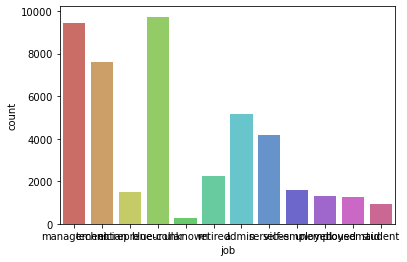

In [32]:
sb.countplot(x='job',data=bank,palette="hls")


<AxesSubplot:xlabel='housing', ylabel='count'>

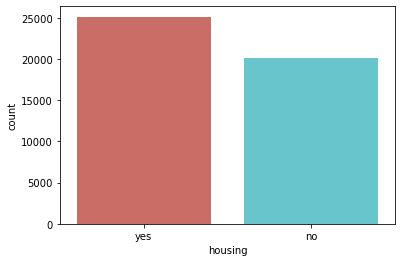

In [30]:
sb.countplot(x='housing',data=bank,palette="hls")

<AxesSubplot:xlabel='loan', ylabel='count'>

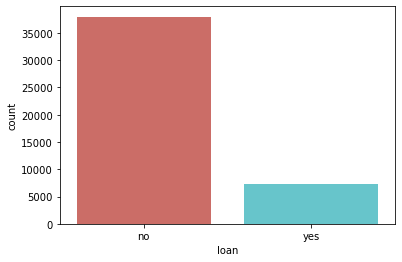

In [31]:
sb.countplot(x='loan',data=bank,palette="hls")

<AxesSubplot:xlabel='contact', ylabel='count'>

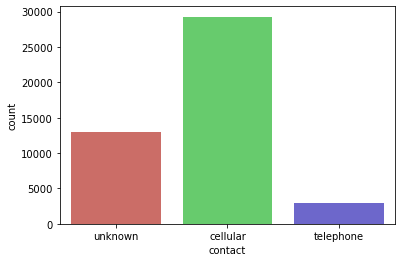

In [34]:
sb.countplot(x='contact',data=bank,palette="hls")

<AxesSubplot:xlabel='campaign', ylabel='count'>

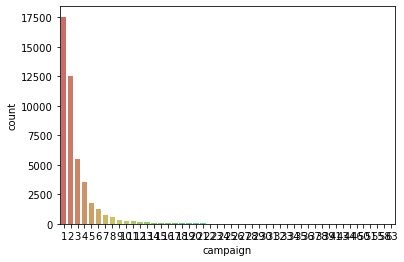

In [35]:
sb.countplot(x='campaign',data=bank,palette="hls")

<AxesSubplot:xlabel='previous', ylabel='count'>

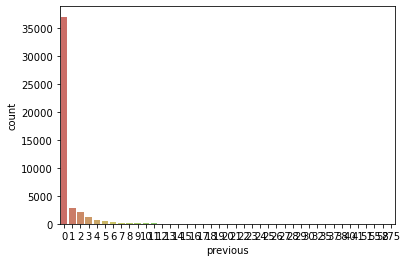

In [36]:
sb.countplot(x='previous',data=bank,palette="hls")

<AxesSubplot:xlabel='poutcome', ylabel='count'>

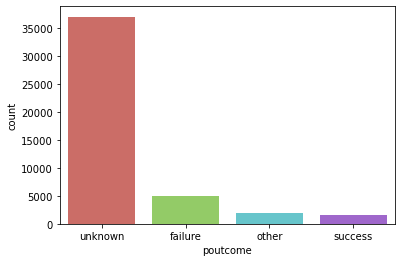

In [37]:
sb.countplot(x='poutcome',data=bank,palette="hls")

In [38]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [39]:
bank.describe ##getting summary of the dataframe

<bound method NDFrame.describe of        age           job  balance housing loan    contact  campaign  previous  \
0       58    management     2143     yes   no    unknown         1         0   
1       44    technician       29     yes   no    unknown         1         0   
2       33  entrepreneur        2     yes  yes    unknown         1         0   
3       47   blue-collar     1506     yes   no    unknown         1         0   
4       33       unknown        1      no   no    unknown         1         0   
...    ...           ...      ...     ...  ...        ...       ...       ...   
45206   51    technician      825      no   no   cellular         3         0   
45207   71       retired     1729      no   no   cellular         2         0   
45208   72       retired     5715      no   no   cellular         5         3   
45209   57   blue-collar      668      no   no  telephone         4         0   
45210   37  entrepreneur     2971      no   no   cellular         2        

In [40]:
bank.info ##getting summary of the dataframe

<bound method DataFrame.info of        age           job  balance housing loan    contact  campaign  previous  \
0       58    management     2143     yes   no    unknown         1         0   
1       44    technician       29     yes   no    unknown         1         0   
2       33  entrepreneur        2     yes  yes    unknown         1         0   
3       47   blue-collar     1506     yes   no    unknown         1         0   
4       33       unknown        1      no   no    unknown         1         0   
...    ...           ...      ...     ...  ...        ...       ...       ...   
45206   51    technician      825      no   no   cellular         3         0   
45207   71       retired     1729      no   no   cellular         2         0   
45208   72       retired     5715      no   no   cellular         5         3   
45209   57   blue-collar      668      no   no  telephone         4         0   
45210   37  entrepreneur     2971      no   no   cellular         2        11

In [41]:
bank.dtypes ## chekiong data types

age          int64
job         object
balance      int64
housing     object
loan        object
contact     object
campaign     int64
previous     int64
poutcome    object
y           object
dtype: object

In [42]:
## now we going to plotting for bar plot using below functions

<AxesSubplot:xlabel='job'>

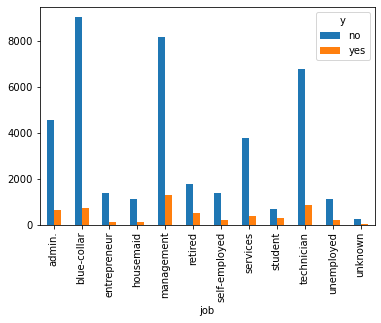

In [43]:
pd.crosstab(bank.job,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='housing'>

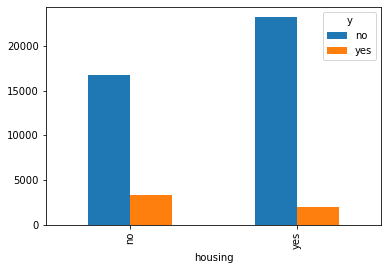

In [44]:
pd.crosstab(bank.housing,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='loan'>

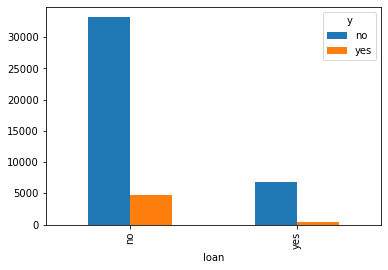

In [47]:
pd.crosstab(bank.loan,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='contact'>

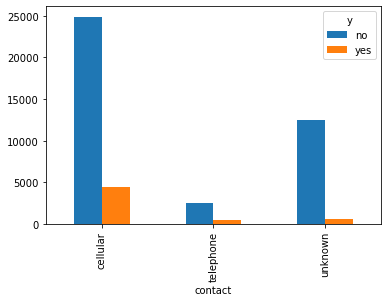

In [48]:
pd.crosstab(bank.contact,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

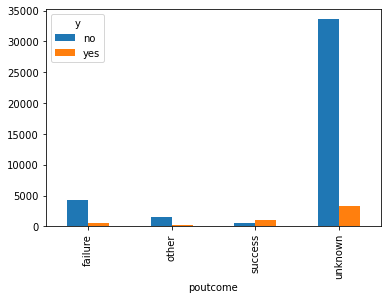

In [49]:
pd.crosstab(bank.poutcome,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='campaign'>

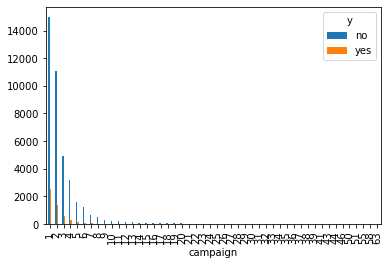

In [50]:
pd.crosstab(bank.campaign,bank.y).plot(kind="bar")

<AxesSubplot:xlabel='previous'>

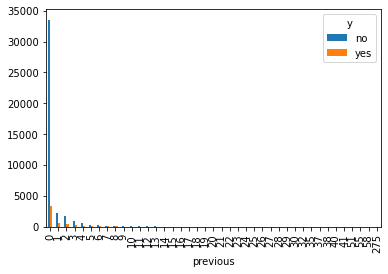

In [51]:
pd.crosstab(bank.previous,bank.y).plot(kind="bar")

In [52]:
### Lets see the box plonow

<AxesSubplot:xlabel='age', ylabel='y'>

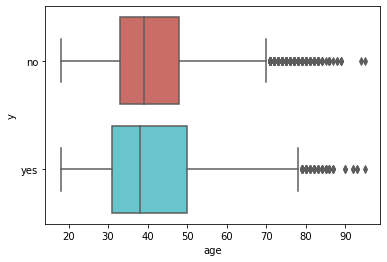

In [53]:
sb.boxplot(x="age",y="y",data=bank,palette='hls')

<AxesSubplot:xlabel='balance', ylabel='y'>

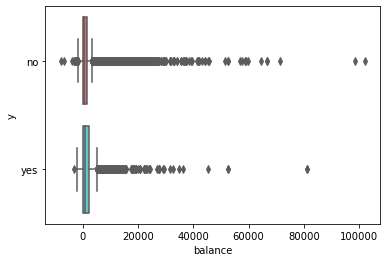

In [54]:
sb.boxplot(x="balance",y="y",data=bank,palette='hls')

In [55]:
# boxplot needs at least one numeric variable  we can only see these two plots

In [56]:
bank.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
campaign    0
previous    0
poutcome    0
y           0
dtype: int64

In [57]:
bank.shape

(45211, 10)

In [58]:
# We need build the model for datasets
# Create the X & Y datasets

In [59]:
X=bank.drop(["y"],axis=1)

In [60]:
Y=bank.iloc[:,9]

In [62]:
##create the dummy for the catagorical data

In [63]:
X_dummies = pd.get_dummies(X[["job","housing","loan","contact","poutcome"]])

In [64]:
# drop the original columns

In [65]:
X.drop(["job","housing","loan","contact","poutcome"],inplace=True,axis=1)

In [66]:
X_new = pd.concat([X,X_dummies],axis=1)

In [98]:
banks=LogisticRegression()

In [99]:
banks.fit(X_new,Y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
print(banks.intercept_,banks.coef_)

[-0.43661198] [[-1.32071350e-02  3.36477572e-05 -1.35720177e-01  2.09117057e-02
  -6.14213328e-02 -3.73794120e-01 -5.43593418e-02 -3.29608987e-02
   1.64426007e-02  2.98621490e-01 -2.43693464e-02 -1.49194809e-01
   6.28635122e-02 -1.37701182e-01  1.88218674e-02  5.53884626e-04
   4.66802913e-01 -9.03300589e-01 -6.42602211e-02 -3.72237455e-01
   2.41021971e-01  7.09239093e-02 -7.48443556e-01 -2.44784628e-01
  -4.21309925e-02  6.52469040e-01 -8.02051096e-01]]


In [71]:
print(banks.intercept_)    #B0

[-0.43661198]


In [72]:
prob = banks.predict_proba(X_new)

In [73]:
#Predicting probability values

In [74]:
y_pred = banks.predict(X_new)    #predicting output inplace of the probabiulity values

In [75]:
bank["y_pred"] = y_pred

In [76]:
y_prob = pd.DataFrame(banks.predict_proba(X_new.iloc[:,:]))

In [77]:
new_bank = pd.concat([bank,y_prob],axis=1)

In [78]:
new_Y = pd.concat([Y,y_prob],axis=1)  #concating original output and output probabilities

In [79]:
Y_dummy = pd.get_dummies(Y)

In [80]:
# Confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [83]:
print(confusion_matrix)

[[39687   235]
 [ 4756   533]]


In [84]:
type(y_pred)

numpy.ndarray

In [85]:
##cheking accuracy

In [86]:
accuracy = sum(Y==y_pred)/new_bank.shape[0]

In [87]:
new_bank.shape(0)

TypeError: 'tuple' object is not callable

In [88]:
accuracy ###0.889606511689633

0.889606511689633

In [89]:
pd.crosstab(y_pred,Y)

y,no,yes
row_0,,
no,39687,4756
yes,235,533


In [90]:
# ROC Curve

In [91]:
fpr,tpr,thresholds = metrics.roc_curve(Y_dummy.iloc[:,1:],y_prob.iloc[:,1:])

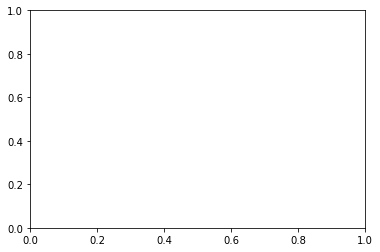

In [92]:
fig,ax = plt.subplots()

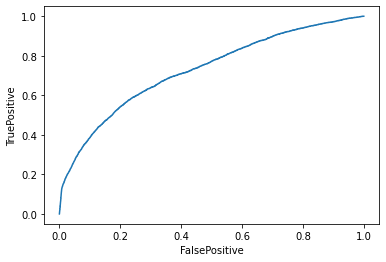

In [93]:
plt.plot(fpr,tpr);plt.xlabel("FalsePositive");plt.ylabel("TruePositive");

In [94]:
roc_auc = metrics.auc(fpr,tpr)

In [95]:
roc_auc ###final Value 0.7278452127991046

0.7278452127991046